# Categorical Data Plots

Plotting categorical data! Main plot types:

* barplot
* countplot
* boxplot
* violinplot
* stripplot
* swarmplot
* factorplot

barplot and countplot allows you to get aggregate data off a categorical feature in your data. <br>
boxplots and violinplots are used to shown the distribution of categorical data. <br>
stripplot and swarmplot are similar. <br>
<br>
The more complicated plots, violin, strip, swarm, are not suited to presenting to non-data scientists. Good for exploring only. 

In [6]:
import numpy as np
import seaborn as sns
%matplotlib inline 

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot:
**barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

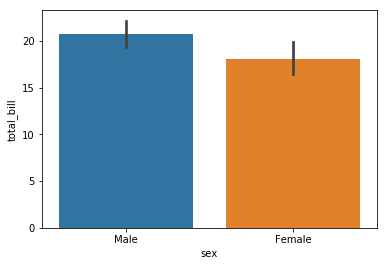

In [5]:
sns.barplot(x='sex',y='total_bill',data=tips) #x should be a categorical column, y can be numerical

#By default, this shows mean total_bill for each category

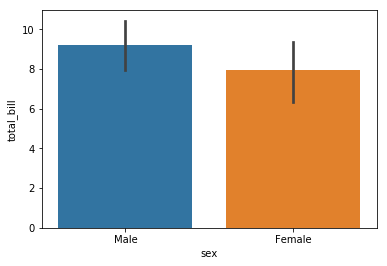

In [9]:
#we can also create our own function for estimator, default is mean
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) #using numpy's standard deviation function

# countplot:
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

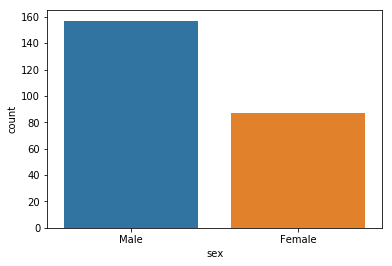

In [11]:
sns.countplot(x='sex', data=tips)
#here we can see there are more men than women in our dataset

## boxplots:
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

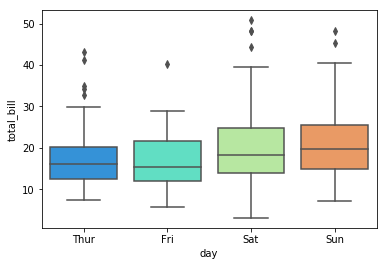

In [13]:
sns.boxplot(x='day',y='total_bill',data=tips, palette='rainbow')

The middle line through the box is the median. <br>
The top/bottom edges of the boxes show the quartile. <br>
The lines are the whiskers, showing the rest of the distribution. <br>
The points outside the whiskers are outliers.

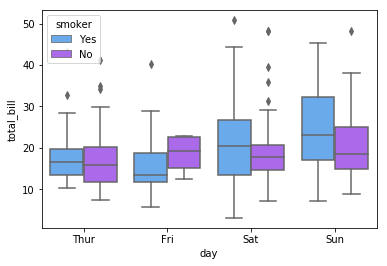

In [17]:
#we can split up box plot even further by sepcifying a hue:
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker', palette='cool')

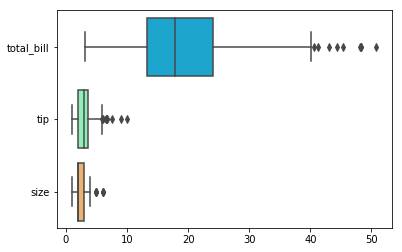

In [21]:
#use orient='h' to change orignation, i.e. horizontal box plot
# THIS ONLY WORKS IF YOU PLOT ENTIRE DATAFRAME. cannot use x, y to select things... :(
sns.boxplot(data=tips, palette='rainbow', orient='h')

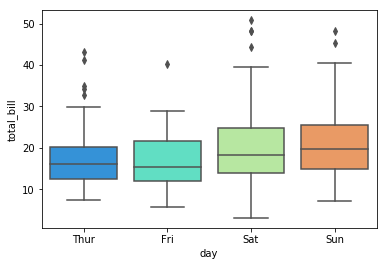

In [22]:
#original boxplot for comparison with violin plot:
sns.boxplot(x='day',y='total_bill',data=tips, palette='rainbow')

## violinplot:
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

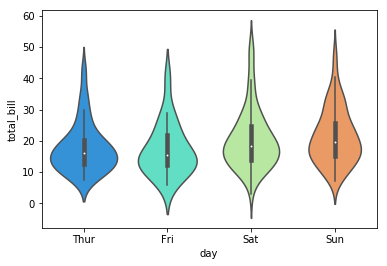

In [23]:
sns.violinplot(x='day',y='total_bill',data=tips, palette='rainbow')

So if we look at the violin on it's side and half of it, it's like the KDE. <br>
Gives more info, but harder to understand. 

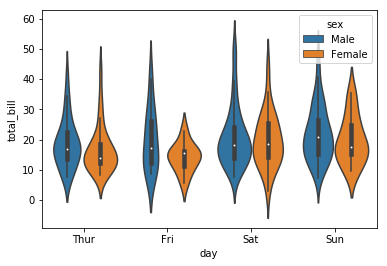

In [26]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex')

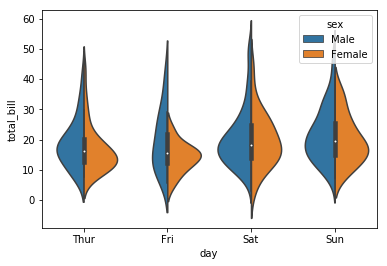

In [25]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex',split=True)
#split=True is used for hue

## stripplot:
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

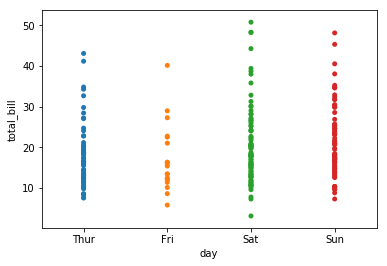

In [29]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=False)

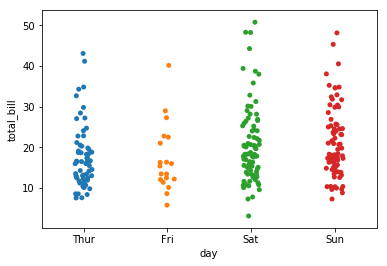

In [28]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True)

#turning jitter on makes it easier to see, the denser clumps has more data points. 

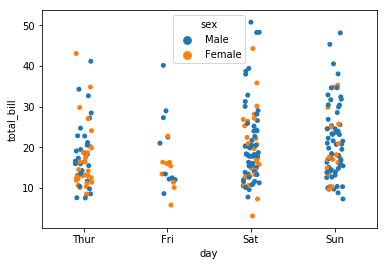

In [33]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex')

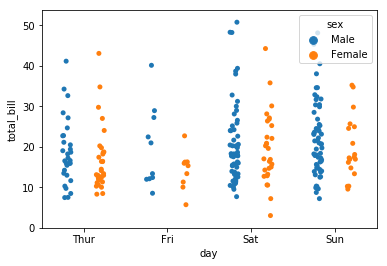

In [37]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex', dodge=True)
#dodge is the same thing as split paramter we used above for violinplots, split is deprecated

## swarmplot:
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them). <br>
Basically a stripplot + violinplot. Show shte distribution but uses the points itself. 

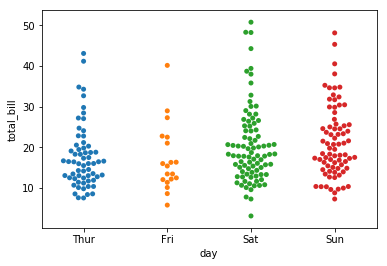

In [38]:
sns.swarmplot(x='day',y='total_bill',data=tips)

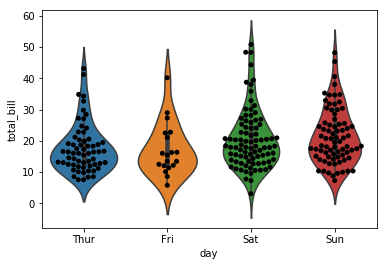

In [39]:
#combining swarmplot with violinplot, by plotting swarmplot on top of it!
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, color='black')

## factorplot:
factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type. It is the same as calling the exact categorical plot itself, e.g. calling barplot instead of setting `kind='bar'`. <br>
<br>
Warning: <br>
The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)

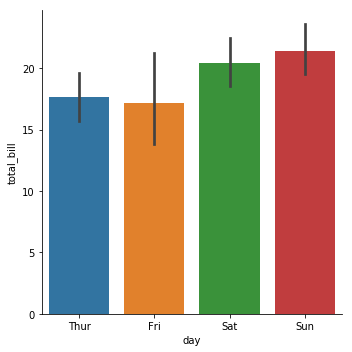

In [42]:
sns.catplot(x='day',y='total_bill',data=tips, kind='bar')
#we can change kind to any of the plots we did above: strip, violin, swarm...etc. 